In [60]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/home/alex.olar@odigeo.org/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [243]:
e = ['teljesCr.txt',
    'meresCrbigpeak.txt',
     'meresMn2peak.txt',
     'meresMn6peaks.txt']

ee = {}

for _e in range(len(e)):
    ee[e[_e]] = np.loadtxt('./bullshit/' + e[_e], comments='#', delimiter='\t')
    ee[e[_e]][:, 1] *= 1e-3

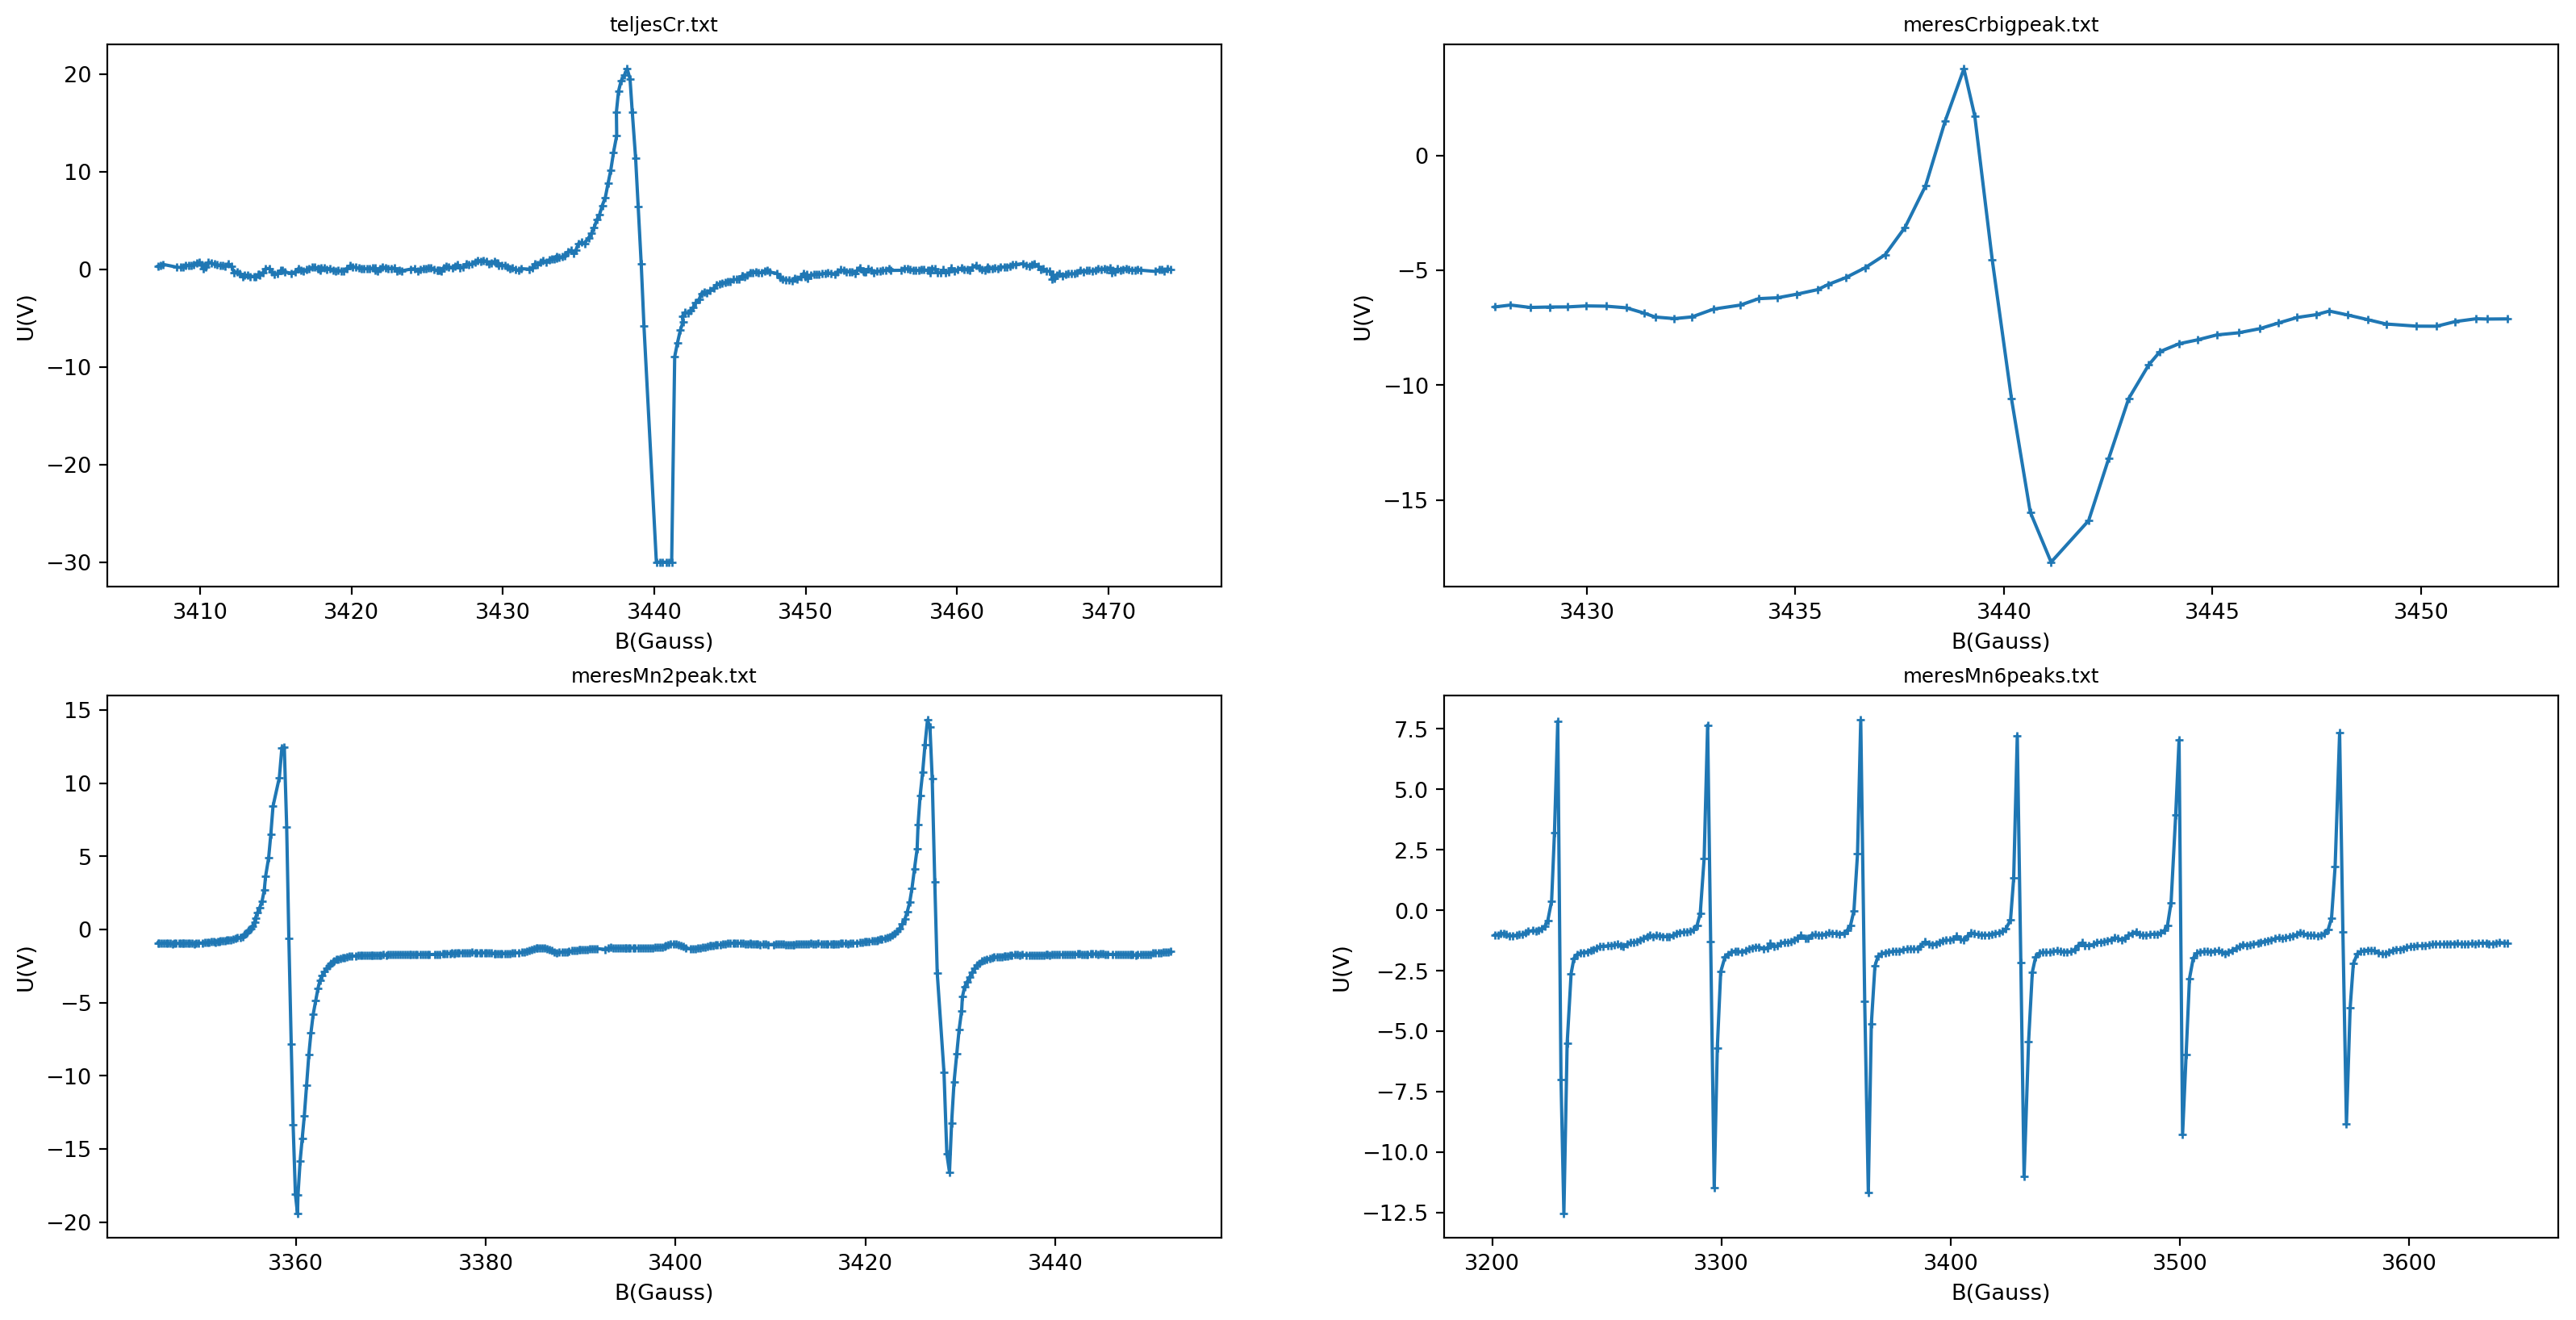

In [244]:
nr = 2
nc = 2
fig, axes = plt.subplots(nr, nc, figsize=(20,10), dpi=196)
for _e in range(len(e)):
    axes[_e//nc, _e%nc].plot(ee[e[_e]][:,0], ee[e[_e]][:,1], '+-', markersize=4)# , '.', markersize=2)
    axes[_e//nc, _e%nc].set_title(e[_e], fontsize=9)
    axes[_e//nc, _e%nc].set_ylabel("U(V)", fontsize=10)
    axes[_e//nc, _e%nc].set_xlabel("B(Gauss)", fontsize=10)
  
plt.savefig("osszes_abrazolva.png")

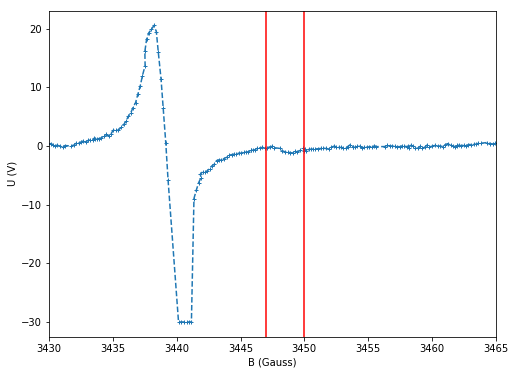

In [289]:
plt.plot(ee[e[0]][:,0], ee[e[0]][:,1], '+--', markersize=4)
plt.xlim(3430, 3465)
plt.axvline(x=3447, c='r')
plt.axvline(x=3450, c='r')
plt.xlabel('B (Gauss)')
plt.ylabel('U (V)')
plt.savefig('alex_cromium.png', dpi=200)

In [245]:
# Lorentz gorbe derivaltja
def lderiv(x, a, s, x0, c):
    return -2*a*s*(x-x0)/((1+s*(x-x0)**2)**2) + c# offset

In [246]:
from scipy.optimize import curve_fit
from scipy import interpolate

def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def fitlderiv(_e, xmin, xmax, _e0, imgname="e.png"):    
    _ee = slice(find_nearest_index(ee[e[_e]][:,0], xmin), find_nearest_index(ee[e[_e]][:,0], xmax))
    
    f = interpolate.interp1d(ee[e[_e]][_ee, 0], ee[e[_e]][_ee, 1])
    
    xnew = np.linspace(ee[e[_e]][_ee, 0][0], ee[e[_e]][_ee, 0][::-1][0], 1000)
    ynew = f(xnew)
    

    plt.figure(figsize(8,6), dpi=196)
    plt.plot(ee[e[_e]][_ee, 0], ee[e[_e]][_ee, 1], 'go', xnew, ynew, 'b--', markersize=3, label="Meresi pontok")

    popt, pcov = curve_fit(lderiv, xnew, ynew, p0=_e0)
  
    xx = np.linspace(xmin, xmax, 100)
    plt.plot(xx, lderiv(xx, *popt), '-', label="Illesztett fuggveny")
  
    plt.title(e[_e], fontsize=9)
    plt.ylabel("U(V)", fontsize=10)
    plt.xlabel("B(Gauss)", fontsize=10)
    plt.legend()
    plt.savefig("./images/"+imgname)
  
    return popt, np.diag(pcov)

In [247]:
fit_params={}

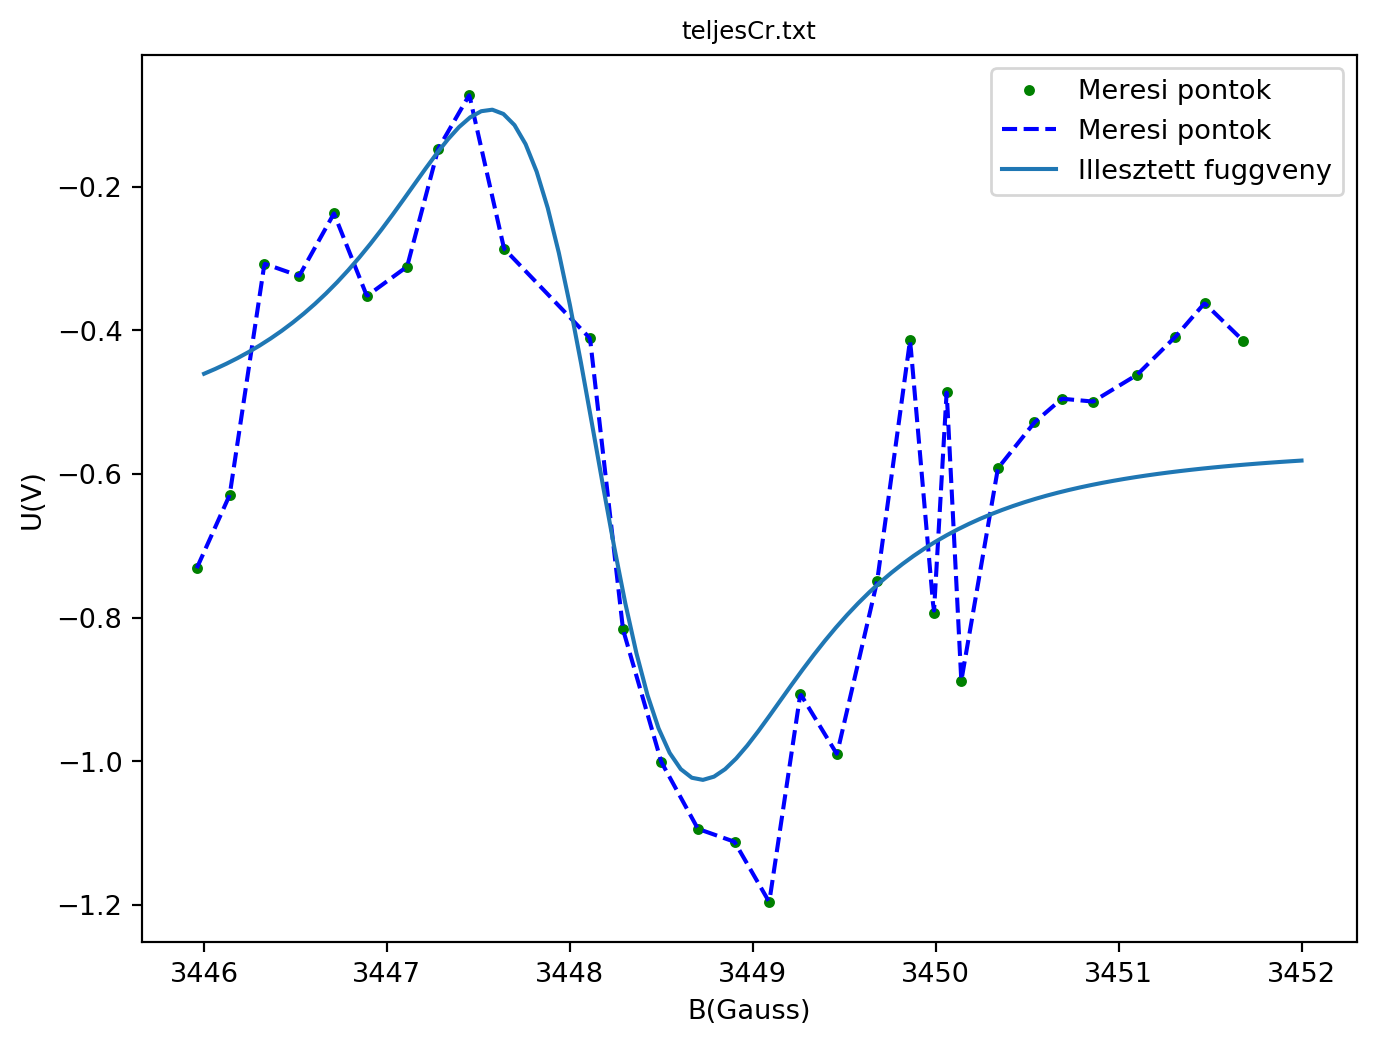

In [248]:
fit_params[e[0]]=fitlderiv(0, 3446, 3452, _e0 = (30, .9, 3447, -100), imgname="alex_meres_cr_small.png")

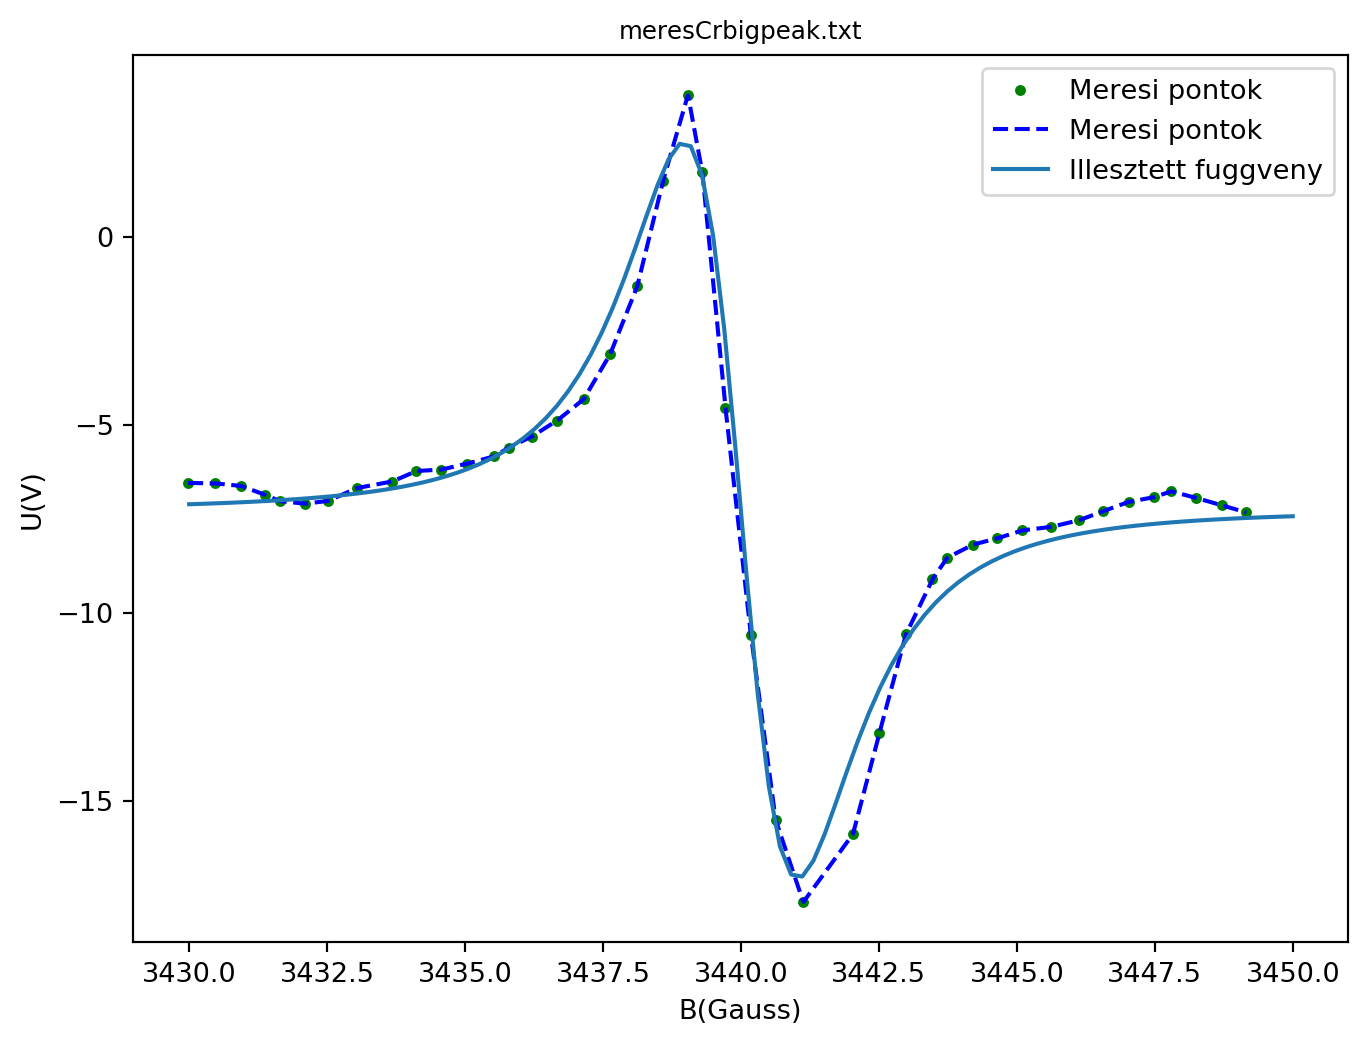

In [249]:
fit_params[e[1]]=fitlderiv(1, 3430, 3450, _e0 = (30, .9, 3440, -100), imgname="alex_meres_cr_big.png")

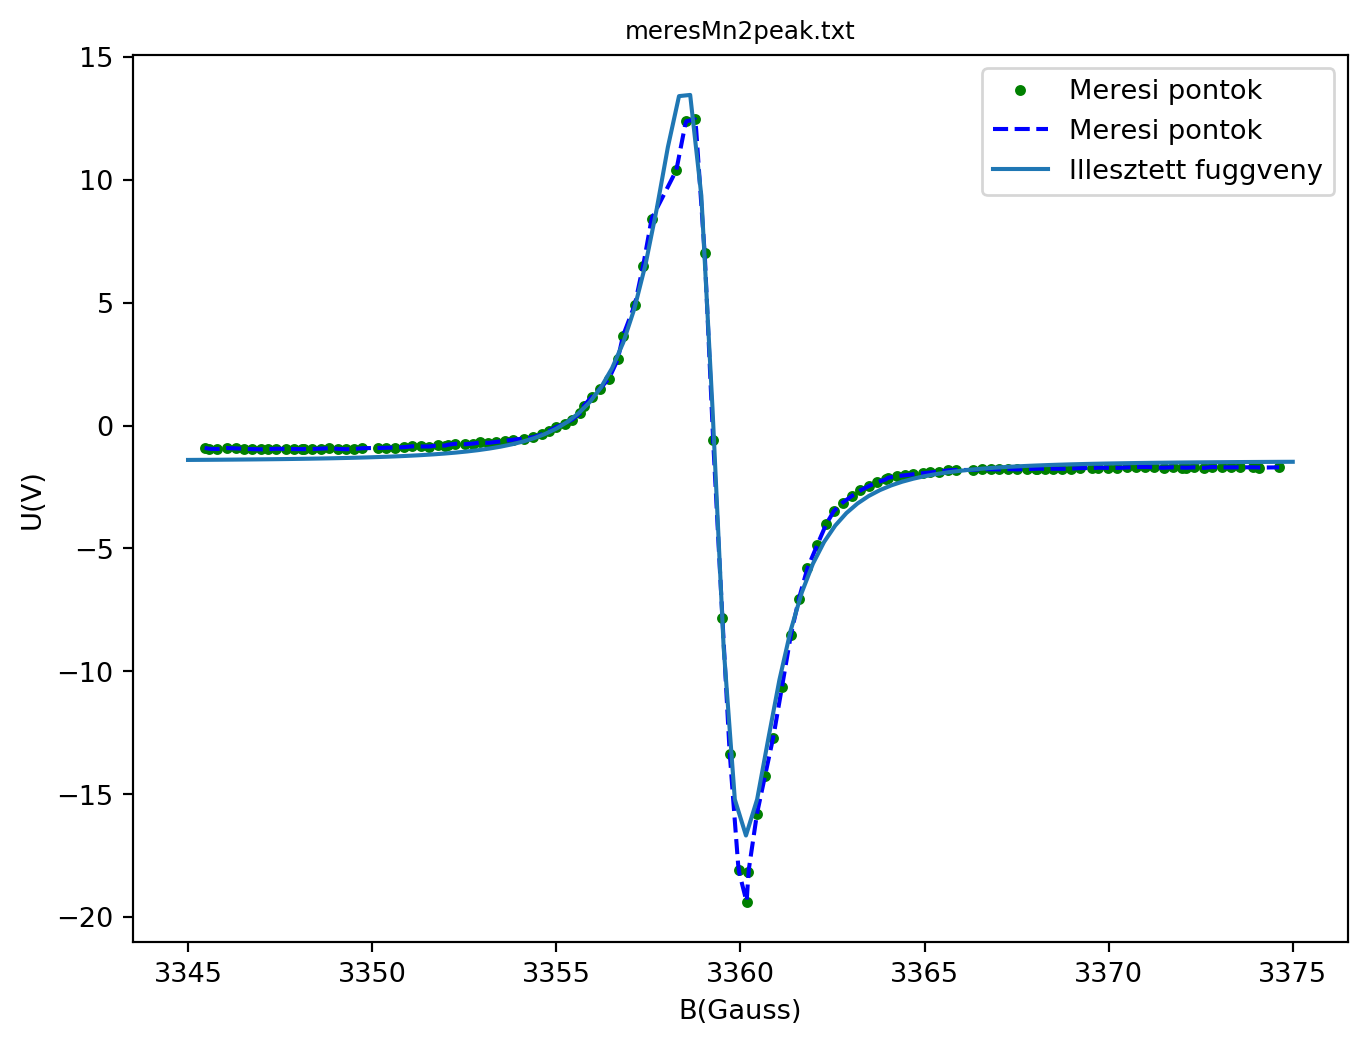

In [250]:
fit_params[e[2]+'1']=fitlderiv(2, 3345, 3375, _e0 = (30, 0.5, 3358, -100), imgname="alex_meresMn2peak1.png")

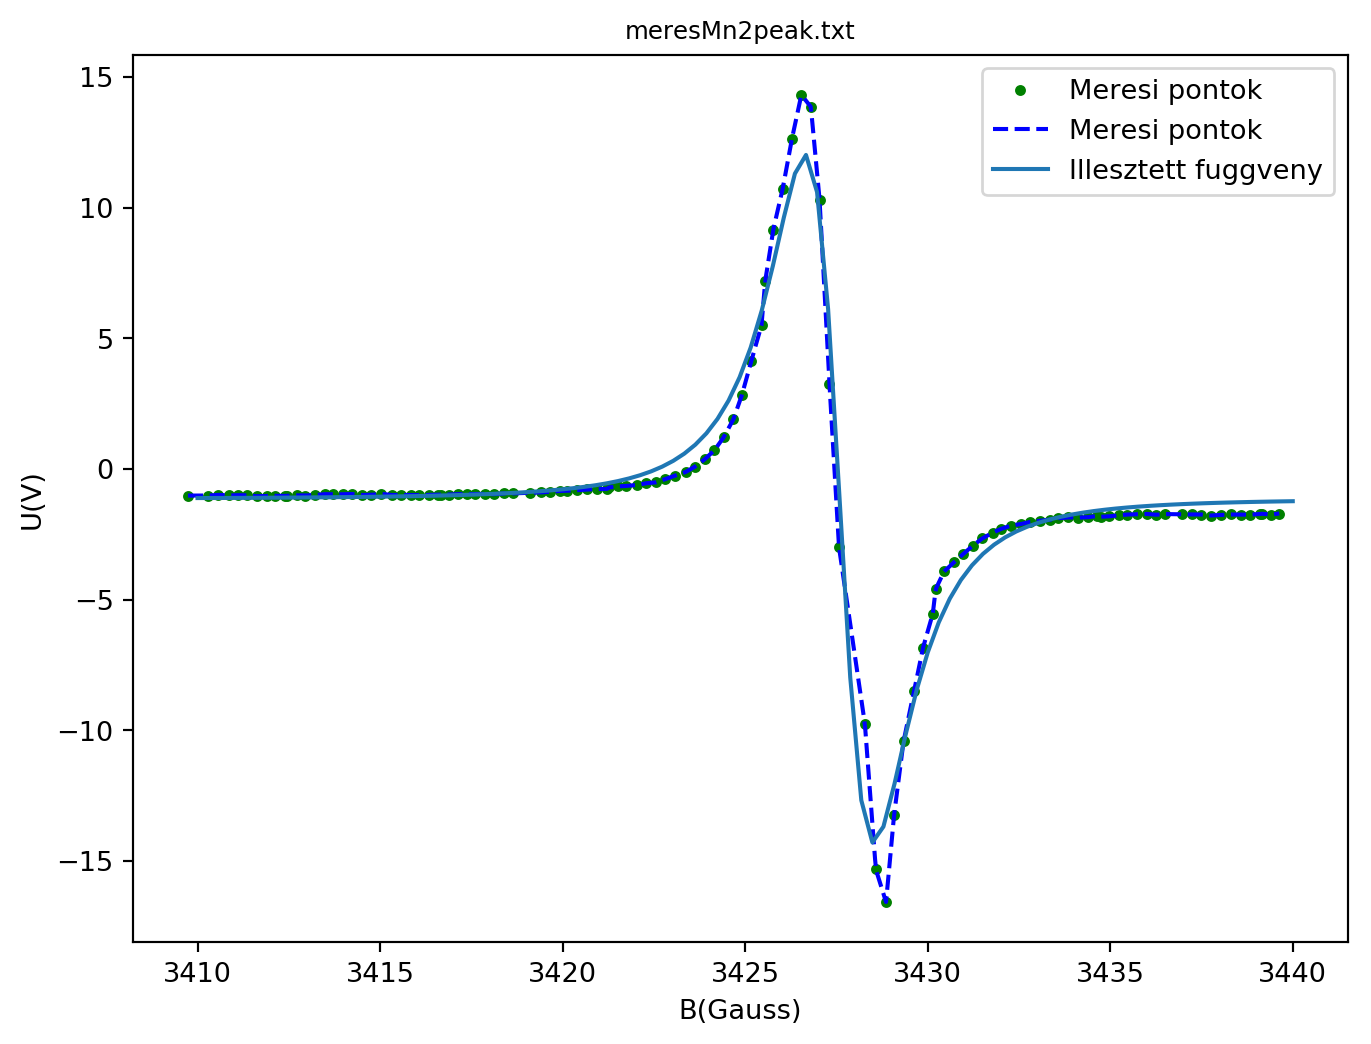

In [251]:
fit_params[e[2]+'2']=fitlderiv(2, 3410, 3440, _e0 = (30, 0.5, 3428, -100), imgname="alex_meresMn2peak2.png")

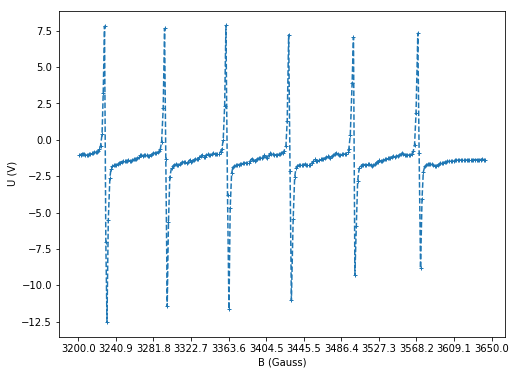

In [280]:
plt.plot(ee[e[3]][:,0], ee[e[3]][:,1], '+--', markersize=4)
plt.xticks(np.linspace(3200, 3650, 12))
plt.xlabel('B (Gauss)')
plt.ylabel('U (V)')
plt.savefig('alex_manganese.png', dpi=200)

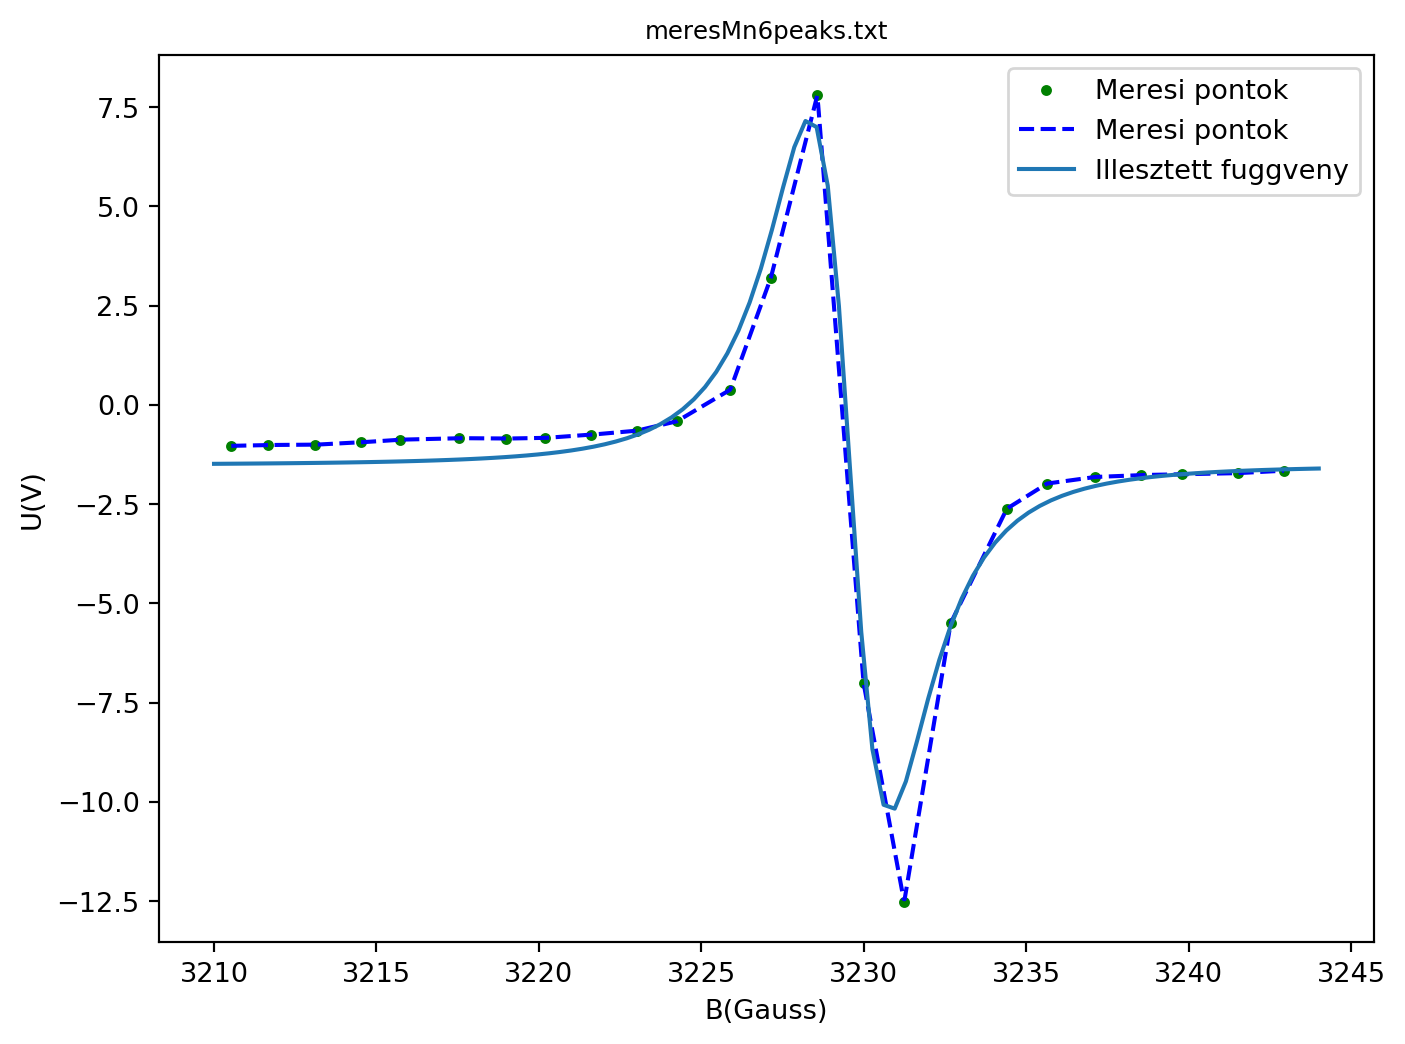

In [262]:
# fitting the Mn for all its 6 peaks
fit_params[e[3]+'1']=fitlderiv(3, 3210, 3244, _e0 = (30, 0.5, 3228, -100), imgname="alex_meresMn_1.png")

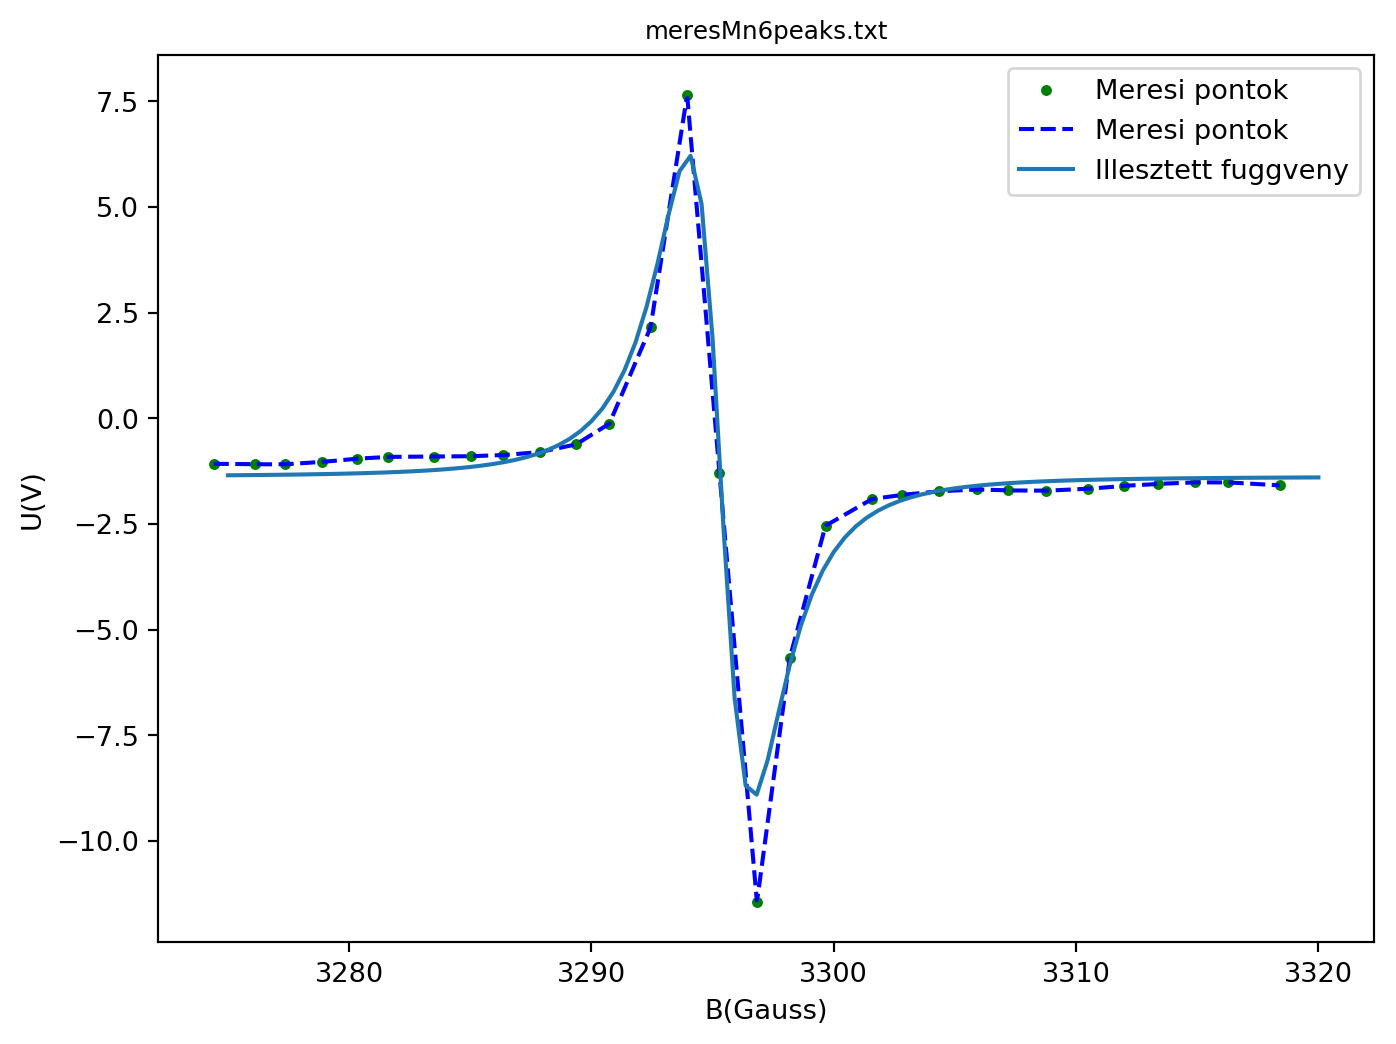

In [263]:
fit_params[e[3]+'2']=fitlderiv(3, 3275, 3320, _e0 = (30, 0.5, 3295, -100), imgname="alex_meresMn_2.png")

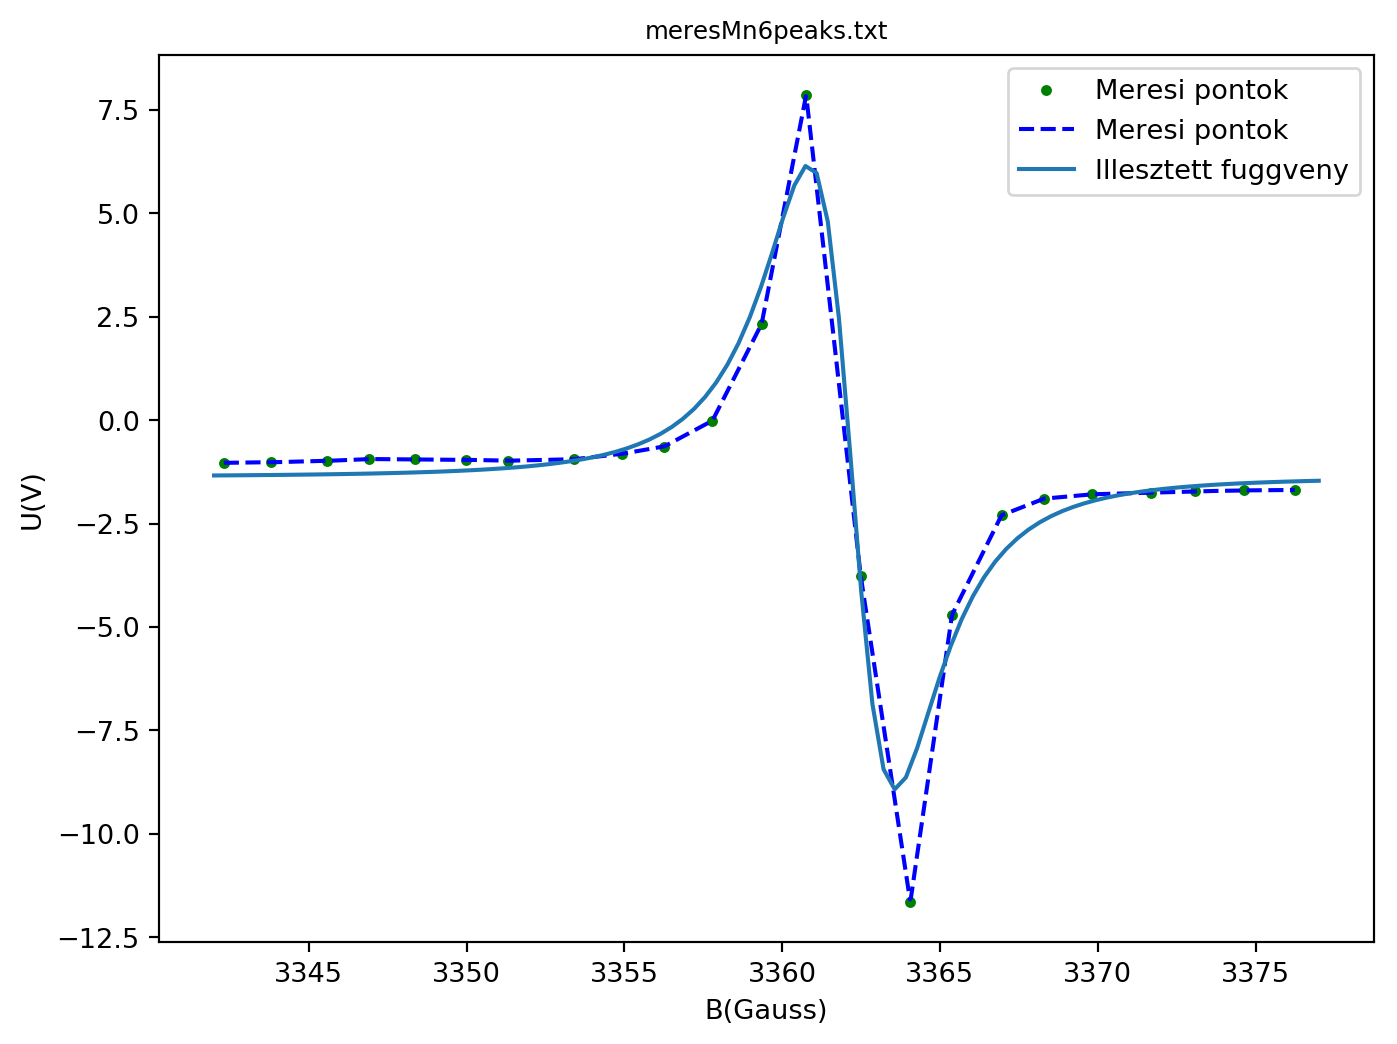

In [264]:
fit_params[e[3]+'3']=fitlderiv(3, 3342, 3377, _e0 = (30, 0.5, 3360, -100), imgname="alex_meresMn_3.png")

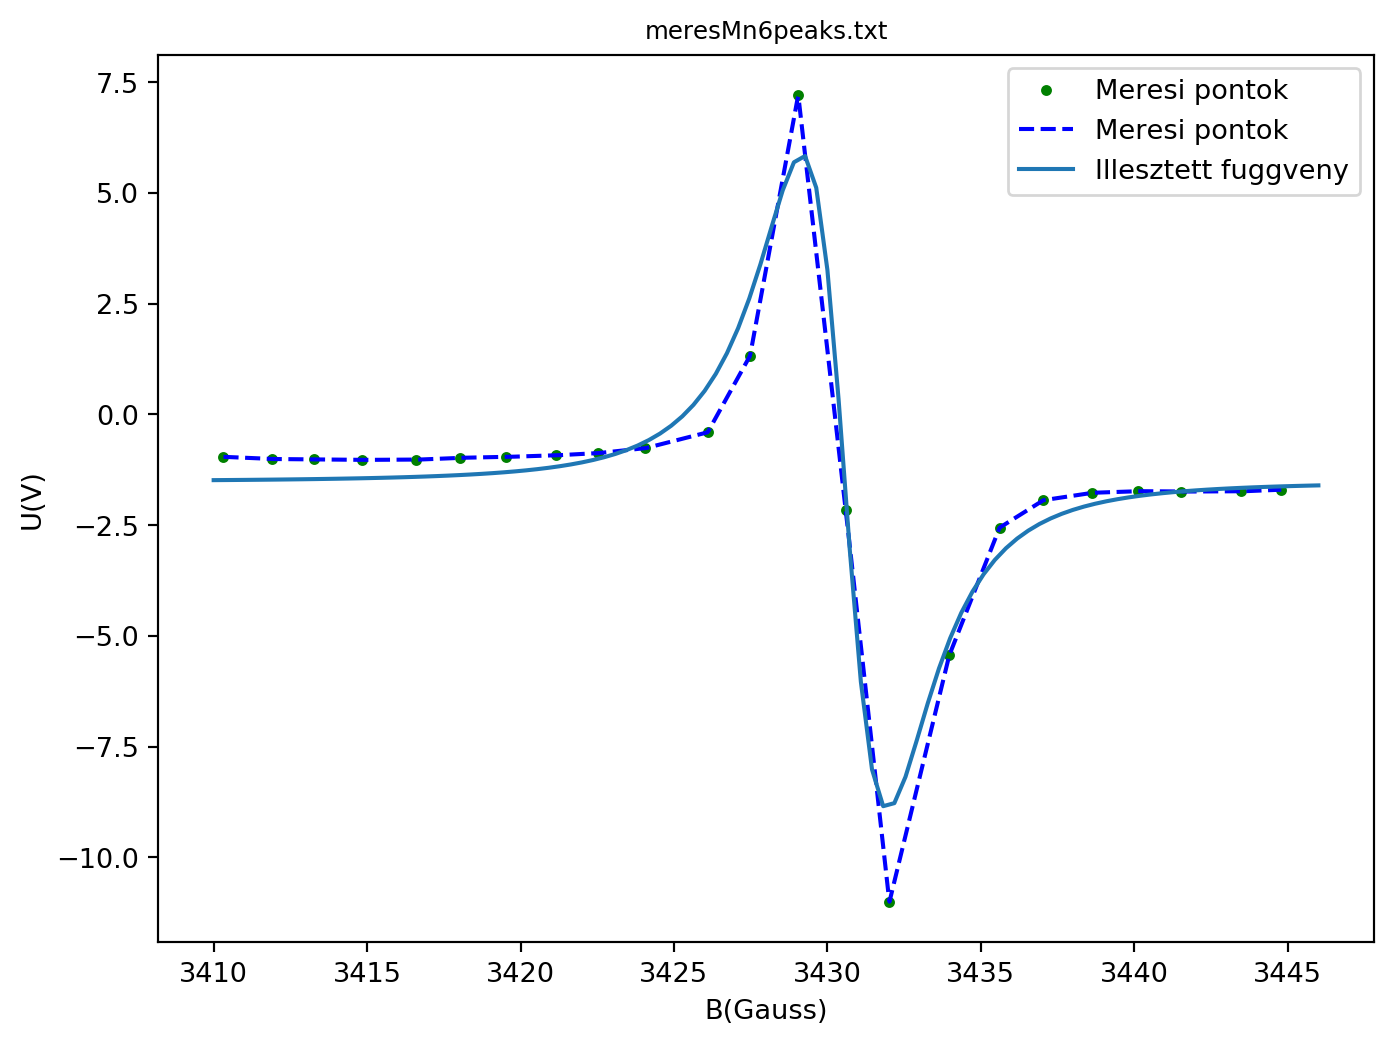

In [266]:
fit_params[e[3]+'4']=fitlderiv(3, 3410, 3446, _e0 = (30, 0.5, 3432, -100), imgname="alex_meresMn_4.png")

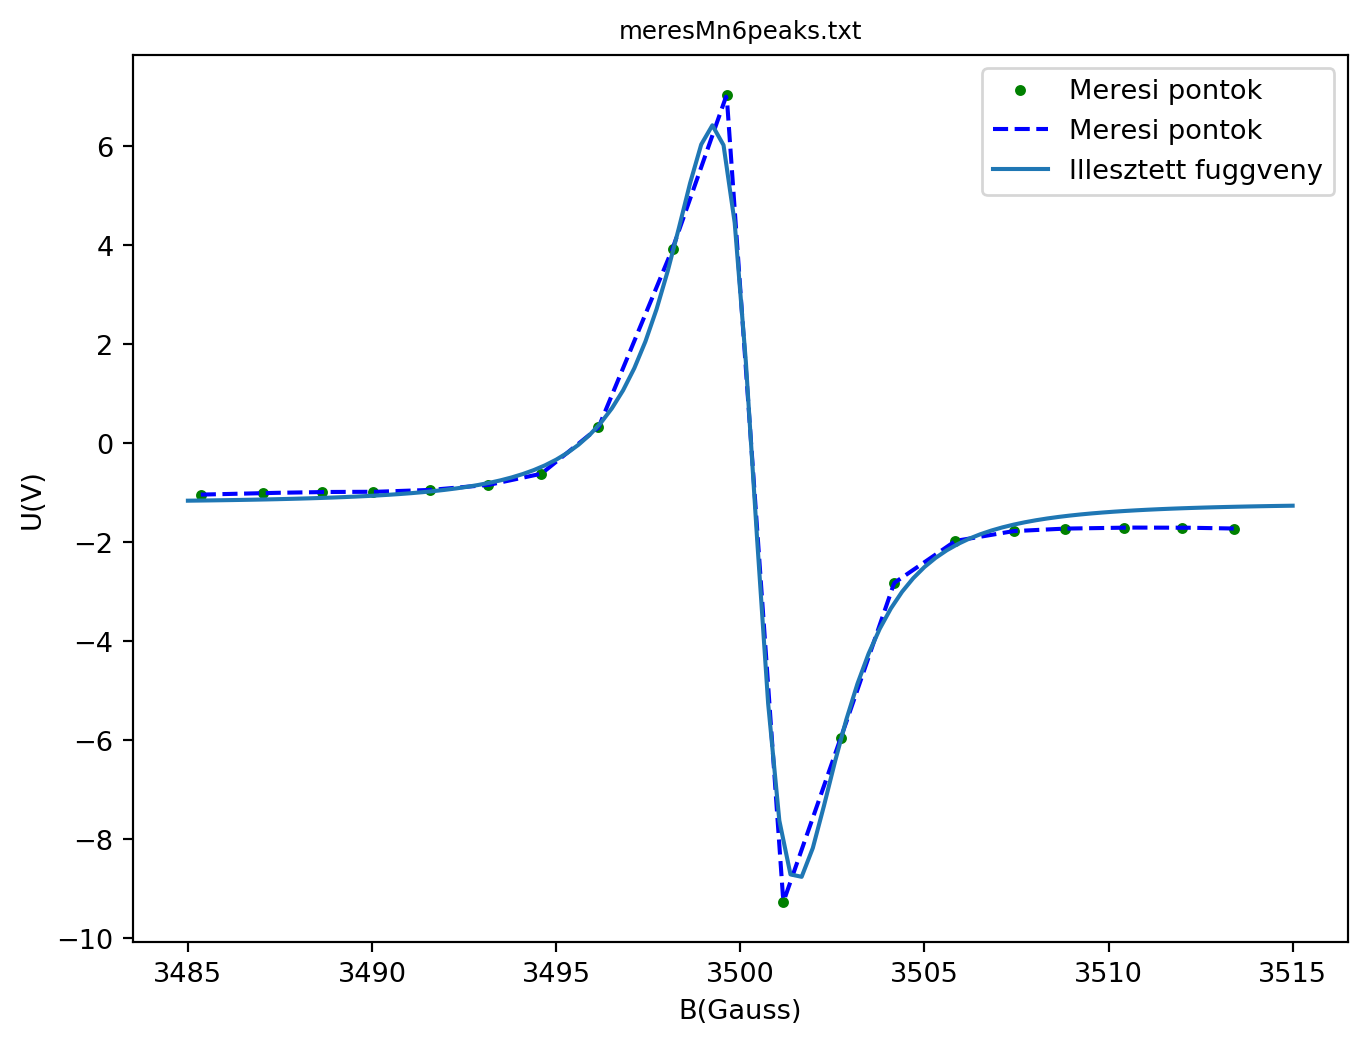

In [270]:
fit_params[e[3]+'5']=fitlderiv(3, 3485, 3515, _e0 = (30, 0.5, 3500, -100), imgname="alex_meresMn_5.png")

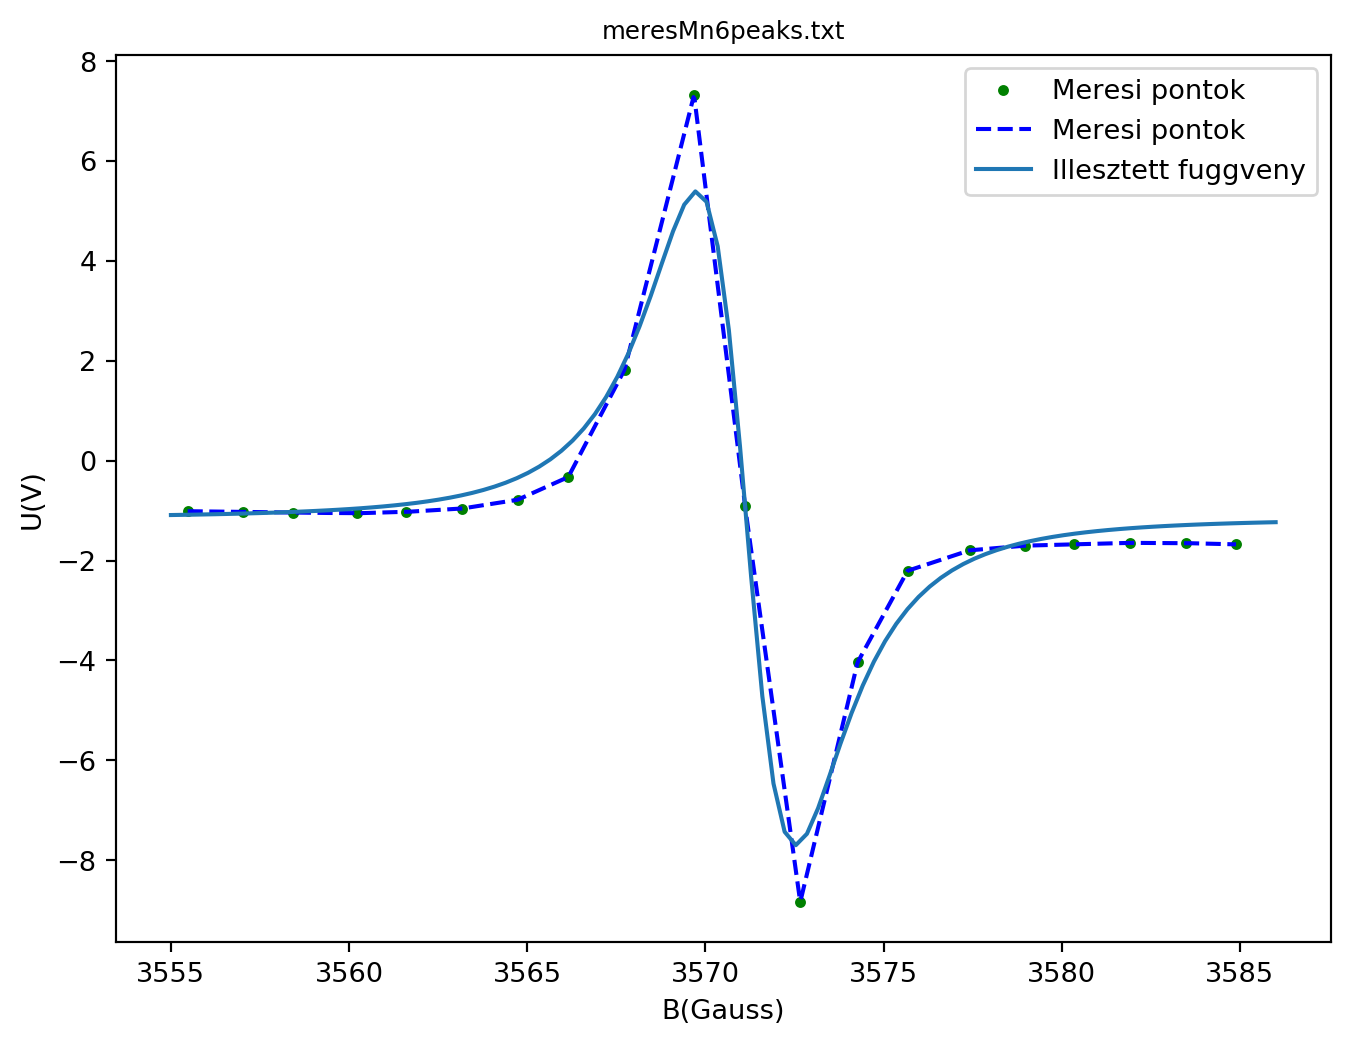

In [274]:
fit_params[e[3]+'6']=fitlderiv(3, 3555, 3586, _e0 = (10, 0.5, 3572, -100), imgname="alex_meresMn_6.png")

In [275]:
for key in fit_params.keys():
    print(key)
    param = fit_params[key][0]
    error = fit_params[key][1]
    for par, err in zip(param, error):
        print("& $%.3f \pm %.5f$" % (par, err), end=' ')
    print("\\\ \hline")

teljesCr.txt
& $0.719 \pm 0.00016$ & $0.998 \pm 0.00129$ & $3448.141 \pm 0.00007$ & $-0.559 \pm 0.00002$ \\ \hline
meresCrbigpeak.txt
& $26.829 \pm 0.02674$ & $0.316 \pm 0.00001$ & $3439.998 \pm 0.00003$ & $-7.278 \pm 0.00046$ \\ \hline
meresMn2peak.txt1
& $32.863 \pm 0.01785$ & $0.511 \pm 0.00002$ & $3359.306 \pm 0.00001$ & $-1.442 \pm 0.00026$ \\ \hline
meresMn2peak.txt2
& $33.014 \pm 0.05435$ & $0.377 \pm 0.00003$ & $3427.586 \pm 0.00003$ & $-1.145 \pm 0.00066$ \\ \hline
meresMn6peaks.txt1
& $28.788 \pm 0.04772$ & $0.218 \pm 0.00001$ & $3229.567 \pm 0.00007$ & $-1.517 \pm 0.00040$ \\ \hline
meresMn6peaks.txt2
& $26.738 \pm 0.03633$ & $0.192 \pm 0.00001$ & $3295.331 \pm 0.00007$ & $-1.380 \pm 0.00021$ \\ \hline
meresMn6peaks.txt3
& $27.546 \pm 0.05404$ & $0.178 \pm 0.00001$ & $3362.214 \pm 0.00010$ & $-1.373 \pm 0.00040$ \\ \hline
meresMn6peaks.txt4
& $27.429 \pm 0.04850$ & $0.172 \pm 0.00001$ & $3430.565 \pm 0.00009$ & $-1.519 \pm 0.00034$ \\ \hline
meresMn6peaks.txt5
& $22.995 \pm 

In [298]:
# areas
for key in fit_params.keys():
    print(key)
    param = fit_params[key][0][0:2]
    error = fit_params[key][1][0:2]
    T = 1./np.sqrt(param[1])*np.pi*param[0]
    T_err = 1./np.sqrt(error[1])*np.pi*error[0]
    print("$%.3f \pm %.3f$" % (T, T_err), end=' ')
    print("\\\ \hline")
    
for key in fit_params.keys():
    print(fit_params[key][0][2])
    
    
print('**************************')
for key in fit_params.keys():
    print(fit_params[key][1][2])  

teljesCr.txt
$2.262 \pm 0.014$ \\ \hline
meresCrbigpeak.txt
$150.005 \pm 21.819$ \\ \hline
meresMn2peak.txt1
$144.362 \pm 13.483$ \\ \hline
meresMn2peak.txt2
$168.919 \pm 32.065$ \\ \hline
meresMn6peaks.txt1
$193.554 \pm 45.240$ \\ \hline
meresMn6peaks.txt2
$191.616 \pm 41.655$ \\ \hline
meresMn6peaks.txt3
$205.070 \pm 56.465$ \\ \hline
meresMn6peaks.txt4
$207.913 \pm 55.221$ \\ \hline
meresMn6peaks.txt5
$141.337 \pm 11.387$ \\ \hline
meresMn6peaks.txt6
$181.596 \pm 36.725$ \\ \hline
3448.1410489380905
3439.9984873474177
3359.3062509910064
3427.586437099822
3229.5669279863505
3295.3313852221436
3362.213778864153
3430.5648397331724
3500.396607889706
3571.1418796264807
**************************
7.436956499159731e-05
2.9361485208905808e-05
8.077540593488333e-06
3.30558835897078e-05
6.589452701215821e-05
6.609907742580068e-05
9.988831581925958e-05
9.37261693067918e-05
1.2272962751844905e-05
7.014767340425969e-05


array([  68.3263282 , 3398.20256989])

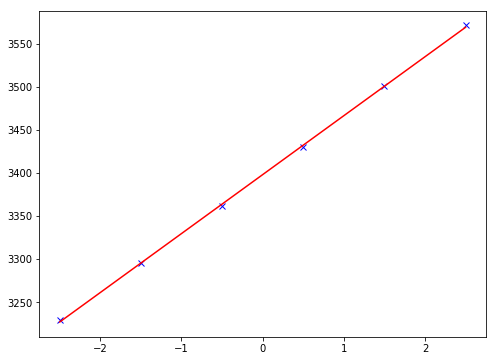

In [306]:
B = [3229.5669279863505, 3295.3313852221436, 3362.213778864153, 
     3430.5648397331724, 3500.396607889706, 3571.1418796264807]
B_err = [6.589452701215821e-05, 6.609907742580068e-05, 9.988831581925958e-05,
         9.37261693067918e-05, 1.2272962751844905e-05, 7.014767340425969e-05]

m = [-2.5, -1.5, -0.5, 0.5, 1.5, 2.5]

plt.plot(m, B, 'bx')

def lin(x, a, b):
    return a*x + b

popt, pcov = curve_fit(lin, m, B, p0=[200, 3000])

x = np.linspace(-2.5, 2.5, 100)
plt.plot(x, lin(x, *popt), 'r')

popt

In [158]:
fit_params.keys()

dict_keys(['meresCrbigpeak.txt', 'meresMn.txt', 'meresMn2peak.txt1', 'meresMn2peak.txt2'])

In [111]:
split_scientific_float(5, 0.000020243)

['2.0243', '-05']

In [16]:
round(1, 5)

1